In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
insurance = pd.read_csv('dataset/insurance.csv')
insurance.sample(10)

,age,sex,bmi,children,smoker,region,charges
1327,51,male,30.030,1,no,southeast,9377.90470
932,46,male,25.800,5,no,southwest,10096.97000
790,39,female,41.800,0,no,southeast,5662.22500
1286,28,female,17.290,0,no,northeast,3732.62510
439,26,male,29.450,0,no,northeast,2897.32350
305,29,male,33.345,2,no,northwest,19442.35350
1070,37,male,37.070,1,yes,southeast,39871.70430
236,18,female,26.730,0,no,southeast,1615.76670
1267,24,male,31.065,0,yes,northeast,34254.05335
267,59,female,32.395,3,no,northeast,14590.63205


In [3]:
insurance.shape

(1338, 7)

In [4]:
insurance_correlation = insurance.corr()
insurance_correlation

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


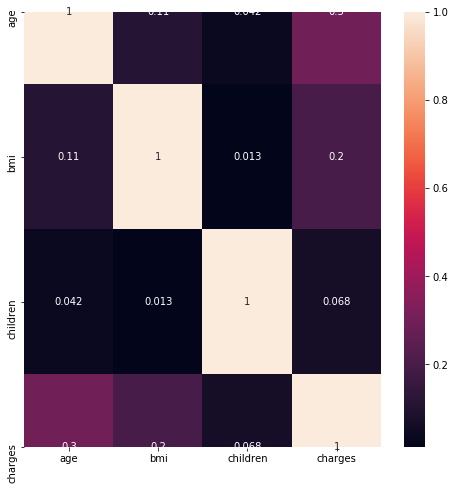

In [5]:
import seaborn as sns

fig, ax = plt.subplots(figsize=(8,8))

sns.heatmap(insurance_correlation, annot=True)

In [6]:
from sklearn import preprocessing

label_encoding = preprocessing.LabelEncoder()

In [7]:
insurance['region'] = label_encoding.fit_transform(insurance['region'].astype(str))

In [8]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,3,16884.92400
1,18,male,33.770,1,no,2,1725.55230
2,28,male,33.000,3,no,2,4449.46200
3,33,male,22.705,0,no,1,21984.47061
4,32,male,28.880,0,no,1,3866.85520


In [9]:
label_encoding.classes_

array(['northeast', 'northwest', 'southeast', 'southwest'], dtype=object)

In [11]:
insurance = pd.get_dummies(insurance, columns=['sex', 'smoker'])

insurance.sample(10)

,age,bmi,children,region,charges,sex_female,sex_male,smoker_no,smoker_yes
522,51,33.915,0,0,9866.30485,1,0,1,0
736,37,38.390,0,2,40419.01910,1,0,0,1
134,20,28.785,0,0,2457.21115,1,0,1,0
1310,42,26.315,1,1,6940.90985,0,1,1,0
979,36,29.920,0,2,4889.03680,1,0,1,0
684,33,18.500,1,3,4766.02200,1,0,1,0
1090,47,36.190,0,2,41676.08110,0,1,0,1
1043,28,25.800,0,3,3161.45400,1,0,1,0
721,53,36.600,3,3,11264.54100,0,1,1,0
691,47,36.200,1,3,8068.18500,0,1,1,0


In [12]:
insurance.to_csv('dataset/insurance_processed.csv', index=False)

In [15]:
insurance_data = pd.read_csv('dataset/insurance_processed.csv')
insurance_data.sample(10)

,age,bmi,children,region,charges,sex_female,sex_male,smoker_no,smoker_yes
1285,47,24.320,0,0,8534.67180,1,0,1,0
1287,36,25.900,1,3,5472.44900,1,0,1,0
1039,19,27.265,2,1,22493.65964,0,1,1,0
1094,50,33.700,4,3,11299.34300,1,0,1,0
510,56,32.110,1,0,11763.00090,0,1,1,0
1079,63,33.660,3,2,15161.53440,0,1,1,0
630,53,36.100,1,3,10085.84600,0,1,1,0
1210,36,30.875,1,1,5373.36425,0,1,1,0
195,19,30.590,0,1,1639.56310,0,1,1,0
1191,41,21.755,1,0,13725.47184,1,0,1,0


In [16]:
insurance_data.shape

(1338, 9)

In [17]:
X = insurance_data.drop('charges', axis=1)
Y = insurance_data['charges']

In [18]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.2)

In [20]:
x_train.shape, y_train.shape

((1070, 8), (1070,))

In [21]:
x_test.shape, y_test.shape

((268, 8), (268,))

In [22]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor

In [23]:
bag_reg = BaggingRegressor(DecisionTreeRegressor(),
                          n_estimators=500,
                          bootstrap=True,
                          max_samples=0.8,
                          n_jobs=-1,
                          oob_score=True)
bag_reg.fit(x_train, y_train)

BaggingRegressor(base_estimator=DecisionTreeRegressor(criterion='mse',
                                                      max_depth=None,
                                                      max_features=None,
                                                      max_leaf_nodes=None,
                                                      min_impurity_decrease=0.0,
                                                      min_impurity_split=None,
                                                      min_samples_leaf=1,
                                                      min_samples_split=2,
                                                      min_weight_fraction_leaf=0.0,
                                                      presort=False,
                                                      random_state=None,
                                                      splitter='best'),
                 bootstrap=True, bootstrap_features=False, max_features=1.0,
                 max_sample

In [25]:
bag_reg.oob_score_

0.8529718176813741

In [27]:
from sklearn.metrics import r2_score

y_pred = bag_reg.predict(x_test)
r2_score(y_test, y_pred)

0.8014101024530605

In [28]:
bag_reg = BaggingRegressor(DecisionTreeRegressor(),
                          n_estimators=500,
                          bootstrap=False,
                          max_samples=0.9,
                          n_jobs=-1)
bag_reg.fit(x_train, y_train)

BaggingRegressor(base_estimator=DecisionTreeRegressor(criterion='mse',
                                                      max_depth=None,
                                                      max_features=None,
                                                      max_leaf_nodes=None,
                                                      min_impurity_decrease=0.0,
                                                      min_impurity_split=None,
                                                      min_samples_leaf=1,
                                                      min_samples_split=2,
                                                      min_weight_fraction_leaf=0.0,
                                                      presort=False,
                                                      random_state=None,
                                                      splitter='best'),
                 bootstrap=False, bootstrap_features=False, max_features=1.0,
                 max_sampl

In [30]:
y_pred = bag_reg.predict(x_test)
r2_score(y_test, y_pred)

0.7475602143735267